# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

- 제출자: 20기 황태연
- 제출 일자: 2023.08.01. (화)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


## 0. 전처리

- 먼저 데이터의 여러 정보를 확인합니다.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


- 결측치가 따로 없음을 확인할 수 있습니다.

- 이상치 제거를 시도하려고 했으나, 이상치에 사기(1)로 분류되는 데이터가 많았습니다. 따라서 이상치 제거를 하지 않습니다.

- 훈련 데이터와 테스트 데이터를 분리합니다.

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25810, 28) (2868, 28) (25810,) (2868,)


- 이제 데이터가 모두 준비되었습니다.

# 1. 로지스틱 회귀분석

- sklearn 라이브러리를 이용해서 로지스틱 회귀분석을 진행합니다.

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # 모델로 로지스틱 회귀 모형을 사용합니다.
model.fit(X_train, y_train) # 주어진 데이터로 모델을 학습시킵니다.

y_pred = model.predict(X_test) # Test dataset에 대하여 모델로 예측합니다.

In [28]:
y_pred[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
y_test[0:100].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

- 앞의 100개의 데이터를 확인해보면, 예측에서는 다음과 같은 결과가 나타났습니다.
    - 정답 0을 올바르게 0으로 예측한 개수: 97 (TP)
    - 정답 1을 올바르게 1로 예측한 개수: 2 (TN)
    - 정답 0을 올바르지 않게 1로 예측한 개수: 1 (FP)
    - 정답 1을 올바르지 않게 0으로 예측한 개수: 0 (FN)
    - 정답률: 99%

# 2. 성능지표

## 2.1. Accuracy(정확도)

- 모델의 정확도를 확인해봅시다.

In [34]:
n = len(y_test)
count = 0
for i, j in zip(y_test, y_pred):
    if i == j:
        count += 1
accuracy = count / n

print("Accuracy:", accuracy)

Accuracy: 0.9954672245467224


- 정답률은 약 99.547%입니다.

## 2.2. Precision(정밀도), Recall(재현율), F1 Score

- 혼동행렬(Confusion matrix, TP, FN, FP, TN을 나타낸 행렬)을 통해 Precision, Recall, F1 Score를 모두 구해봅시다.
- sklearn에서는 confusion_matrix 함수를 제공하고 있으나, 여기에서는 직접 TP, FN, FP, TN을 모두 구할 것입니다.

In [35]:
n = len(y_test)
tp = 0
fn = 0
fp = 0
tn = 0
for i, j in zip(y_test, y_pred):
    if i == 1 and j == 1:
        tp += 1
    elif i == 1 and j == 0:
        fn += 1
    elif i == 0 and j == 1:
        fp += 1
    else:
        tn += 1
        
print('total:', n)
print('tp:', tp)
print('fn:', fn)
print('fp:', fp)
print('tn:', tn)

total: 2868
tp: 25
fn: 11
fp: 2
tn: 2830


In [36]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2*(1/((1/precision)+(1/recall)))

print('Precision:', precision)
print('Recall:', recall)
print('f1:', f1)

Precision: 0.9259259259259259
Recall: 0.6944444444444444
f1: 0.7936507936507936


- 정확도는 매우 높은 편이었으나, 정밀도와 재현율, 그리고 f1 score는 상대적으로 낮습니다.
- 이는 데이터에 0이 매우 많기 때문에 발생한 문제입니다.
- 따라서 정밀도와 재현율을 모두 반영하는 **f1 score**를 향상시키는 방향으로 성능 개선을 시도해보겠습니다.

# 3. 성능 개선

- Logistic Regression 모델을 그대로 가져가면서 성능을 개선시키기 위한 방법은 **Cutoff를 조정**하는 것입니다.
- **Cutoff**: 분류를 위한 기준으로, 1일 확률을 cutoff 이상이라고 판단하면 1이라고 판단하고, 그렇지 않으면 0이라고 판단합니다.
- 기본적으로 Logistic Regression 모델에서는 cutoff가 0.5이므로, 이 수치를 조절하여 성능을 개선하겠습니다.

- 다음은 위의 모델이 0이라고 예측할 확률과 1이라고 예측할 확률을 보여주고 있습니다. (왼쪽: 0, 오른쪽: 1)

In [40]:
score = model.predict_proba(X_test)
score

array([[9.99882929e-01, 1.17070788e-04],
       [9.99086175e-01, 9.13825081e-04],
       [9.99408064e-01, 5.91935576e-04],
       ...,
       [9.99858983e-01, 1.41016618e-04],
       [9.99829610e-01, 1.70389882e-04],
       [9.98788715e-01, 1.21128465e-03]])

- 이를 이용해서 cutoff를 조절해봅시다.

In [54]:
def f1_score(model, X_test, y_test, cutoff):
    score = model.predict_proba(X_test)
    n = len(y_test)
    y_pred = np.zeros(n)
    for idx, (i, j) in enumerate(score):
        if j >= cutoff:
            y_pred[idx] = 1
    
    tp, fn, fp, tn = 0, 0, 0, 0
    for i, j in zip(y_test, y_pred):
        if i == 1 and j == 1:
            tp += 1
        elif i == 1 and j == 0:
            fn += 1
        elif i == 0 and j == 1:
            fp += 1
        else:
            tn += 1
            
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*(1/((1/precision)+(1/recall)))
    
    return f1

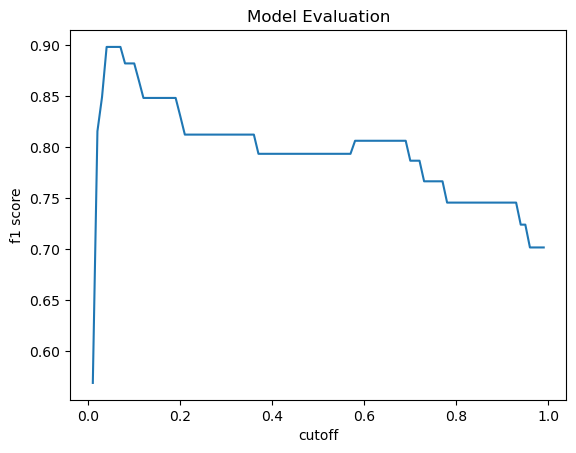

In [57]:
cutoff_list = np.linspace(0.01, 0.99, 99)
f1_list = []
for cutoff in cutoff_list:
    f1 = f1_score(model, X_test, y_test, cutoff)
    f1_list.append(f1)

plt.plot(cutoff_list, f1_list)
plt.xlabel("cutoff")
plt.ylabel("f1 score")
plt.title("Model Evaluation")
plt.show()

In [62]:
print('최적의 cutoff:', cutoff_list[np.argmax(f1_list)])

최적의 cutoff: 0.04


In [63]:
print('최적의 f1 score:', np.max(f1_list))

최적의 f1 score: 0.8985507246376813


- 따라서 cutoff를 0.04로 했을 때 가장 높은 f1 score인 0.89855를 얻을 수 있음을 확인했다.